| MSSV     	| Tên                  	| Tỷ lệ đóng góp 	| Ghi chú     	|
|----------	|----------------------	|----------------	|-------------	|
| 21280064 	| Lê Chơn Minh Đạt     	|      40%         	| Nhóm trưởng 	|
| 21280100 	| Nguyễn Thị Bích Ngọc 	|      30%         	|             	|
| 21280102 	| Đoàn Thị Mẫn Nhi     	|      30%        	|             	|

# Library & Path

In [1]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import plotly.express as px
sheet_csv = r"data/df_merged.csv"
sheet_txt = r"data/df_merged.txt"
pkl_path = r"data/df_merged.pkl"
new_pkl_path = r"data/new_df_merged.pkl"
sheet_csv_clean = r"data/df_merged_clean.csv"

In [2]:
old_list = pd.read_pickle(pkl_path)
old_df = pd.concat(old_list, ignore_index=True)
old_df
#old_df là dataframe chứa dữ liệu của 23 ngày ban đầu chưa qua xử lí

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
0            24.750          78.7         44.60         47.05         29.05   
1            24.750          78.7         44.60         47.05         29.05   
2            24.750          78.7         44.60         47.05         29.05   
3            24.750          78.7         44.60         47.05         29.05   
4            24.750          78.7         44.60         47.05         29.05   
...             ...           ...           ...           ...           ...   
30533        24.025          80.8         45.45         48.90         28.20   
30534        24.000          80.8         45.45         48.90         28.20   
30535        24.000          80.8         45.45         48.90         21.15   
30536        24.000          80.8         45.45         48.90         21.15   
30537        24.000          80.8         45.45         48.90         21.15   

       mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  \
0             79.50          97.0     15.500000        19.250     21.000000   
1             79.50          97.0     15.500000        19.250     21.000000   
2             79.50          97.0     15.500000        19.250     21.000000   
3             79.50          97.0     15.500000        19.250     21.000000   
4             79.50          97.0     15.500000        19.250     21.000000   
...             ...           ...           ...           ...           ...   
30533         77.65         103.4     14.350000        17.750     20.016667   
30534         77.60         103.3     14.350000        17.750     20.050000   
30535         77.60         103.3     11.958333         8.875     17.185714   
30536         77.60         103.3     11.958333         8.875     17.185714   
30537         77.60         103.3     11.958333         8.875     17.185714   

       ...  ban_kl_2TCB  ban_kl_2TPB  ban_kl_2VCB  ban_kl_2VHM  ban_kl_2VIB  \
0      ...          0.0          0.0          0.0          0.0          0.0   
1      ...          0.0          0.0          0.0         10.0          0.0   
2      ...          0.0          0.0         20.0          0.0       2070.0   
3      ...          0.0        800.0         80.0         30.0       3070.0   
4      ...          0.0          0.0          0.0          0.0       4070.0   
...    ...          ...          ...          ...          ...          ...   
30533  ...       1200.0       6230.0          0.0        240.0       2800.0   
30534  ...          0.0       6230.0          0.0        240.0          0.0   
30535  ...          0.0         20.0          0.0         50.0         10.0   
30536  ...        100.0        200.0          0.0          0.0          0.0   
30537  ...        290.0        200.0        490.0          0.0          0.0   

       ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM  ban_kl_2VPB  ban_kl_2VRE  
0              0.0          0.0          0.0          0.0          0.0  
1           1700.0        310.0        110.0      18345.0        230.0  
2              0.0          0.0        115.0      18310.0          0.0  
3           1650.0         10.0        120.0      18335.0          0.0  
4           1650.0          0.0        120.0      18360.0        150.0  
...            ...          ...          ...          ...          ...  
30533          0.0          0.0        160.0      27300.0          0.0  
30534       1520.0          0.0          0.0      27800.0          0.0  
30535          0.0          0.0       3460.0        505.0          0.0  
30536       1410.0          0.0       3460.0        510.0        100.0  
30537       2062.5          0.0       3460.0        510.0          0.0  

[30538 rows x 181 columns]

In [3]:
features = [x for x in old_list[0].columns.values]
feature_remove_target = features
feature_remove_target.remove('Gia KL')
print(feature_remove_target)

['mua_gia_1ACB', 'mua_gia_1BCM', 'mua_gia_1BID', 'mua_gia_1BVH', 'mua_gia_1CTG', 'mua_gia_1FPT', 'mua_gia_1GAS', 'mua_gia_1GVR', 'mua_gia_1HDB', 'mua_gia_1HPG', 'mua_gia_1MBB', 'mua_gia_1MSN', 'mua_gia_1MWG', 'mua_gia_1NVL', 'mua_gia_1PDR', 'mua_gia_1PLX', 'mua_gia_1POW', 'mua_gia_1SAB', 'mua_gia_1SSI', 'mua_gia_1STB', 'mua_gia_1TCB', 'mua_gia_1TPB', 'mua_gia_1VCB', 'mua_gia_1VHM', 'mua_gia_1VIB', 'mua_gia_1VIC', 'mua_gia_1VJC', 'mua_gia_1VNM', 'mua_gia_1VPB', 'mua_gia_1VRE', 'ban_gia_1ACB', 'ban_gia_1BCM', 'ban_gia_1BID', 'ban_gia_1BVH', 'ban_gia_1CTG', 'ban_gia_1FPT', 'ban_gia_1GAS', 'ban_gia_1GVR', 'ban_gia_1HDB', 'ban_gia_1HPG', 'ban_gia_1MBB', 'ban_gia_1MSN', 'ban_gia_1MWG', 'ban_gia_1NVL', 'ban_gia_1PDR', 'ban_gia_1PLX', 'ban_gia_1POW', 'ban_gia_1SAB', 'ban_gia_1SSI', 'ban_gia_1STB', 'ban_gia_1TCB', 'ban_gia_1TPB', 'ban_gia_1VCB', 'ban_gia_1VHM', 'ban_gia_1VIB', 'ban_gia_1VIC', 'ban_gia_1VJC', 'ban_gia_1VNM', 'ban_gia_1VPB', 'ban_gia_1VRE', 'mua_kl_1ACB', 'mua_kl_1BCM', 'mua_kl_1

In [4]:
company_list = []
action_features_list = ["mua_gia_1", "ban_gia_1", "mua_kl_1", "ban_kl_1", "mua_kl_2", "ban_kl_2"]
for item in feature_remove_target:
    new_item = None
    for item_delete in action_features_list:
        if (item_delete in item) == True:
            new_item = item.replace(item_delete,'')
            break
    if (new_item in company_list) == False:
        company_list.append(new_item)

# Preprocessing
* Trong bô dữ liệu giá cổ phiếu, dữ liệu có đặc tính time series, với mức độ tương quan (corelation) giữa các features được nhóm dự báo là thấp.  
* Dữ liệu time series có hệ số tự tương quan rất cao, do đó thích hợp sử dụng các mô hình như Moving Average, Holt Winter, ... Cho kĩ thuật data imputation, và processing missing data  
* Để lựa chọn phương pháp fill missing bằng predict model phù hợp:   
    - Các phương pháp Time Series như Exponential Smoothing, MA, Holt Winter hay ARIMA; 
    - Hoặc các phương pháp cho Panel data như mô hình regression và unsupervise learning, mice ...  
* Tiến hành phân tích tự tương quan Time Series và phân tích Correlation matrix giữa các features


## `1.` Autocorrelation & Partial Autocorelation

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_54213/1253050232.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_54213/1253050232.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


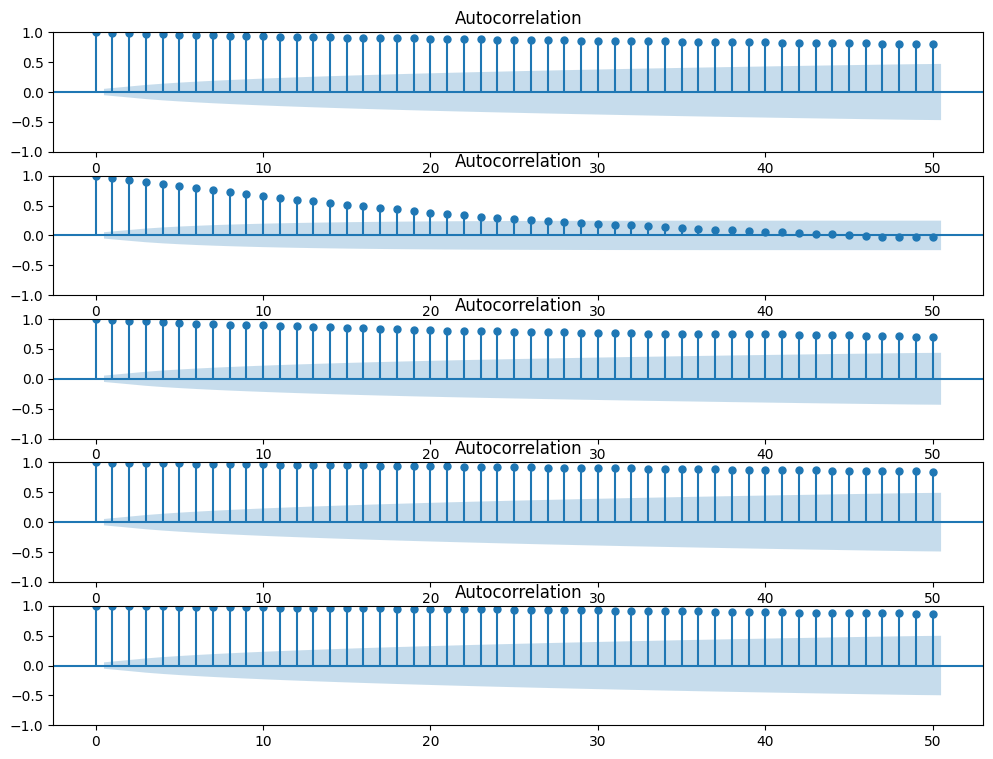

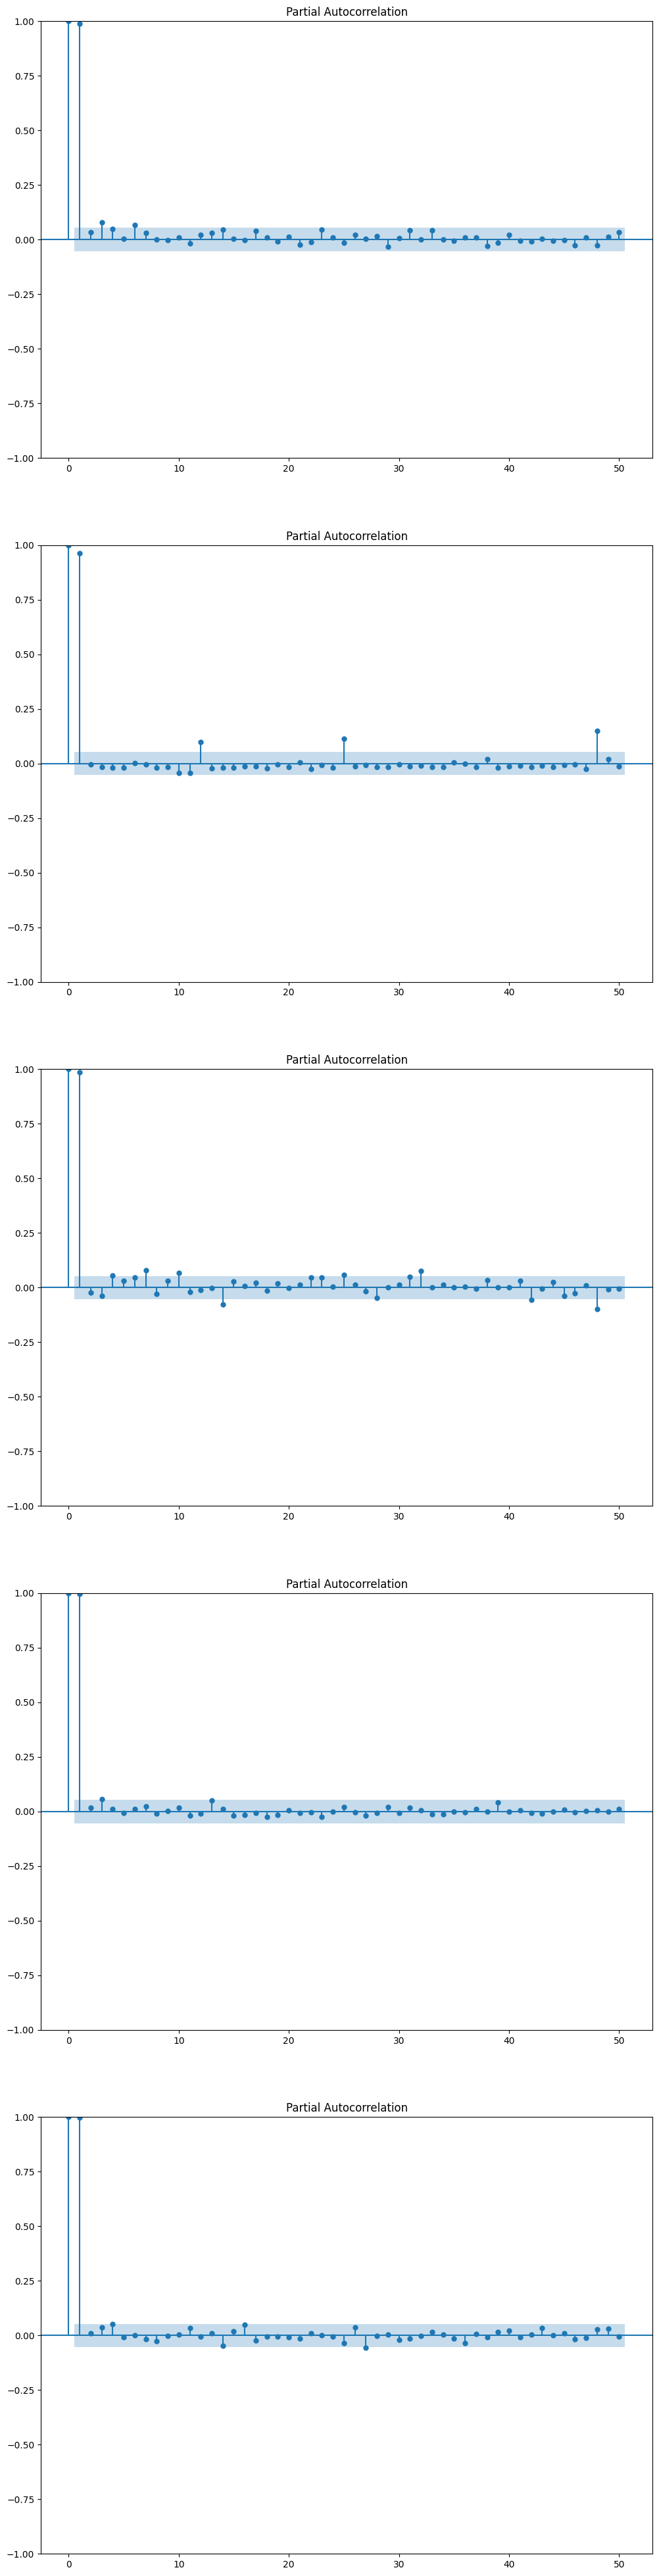

In [8]:
# do khối lượng data lớn, kiểm tra một dataframe trong mẫu
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def autoCorrelation(df):
    df_item = df[0]
    fig, ax = plt.subplots(5, figsize=(12,9))
    for item in range(5):
        ax[item] = plot_acf(df_item.iloc[:, item].dropna(), ax=ax[item], lags=50)
    fig.show()
def partiaAautocorrelation(df):
    df_item = df[0]
    fig, ax = plt.subplots(5, figsize=(12,20))
    for item in range(5):
        ax[item] = plot_pacf(df_item.iloc[:, item].dropna(), ax=ax[item], lags=50)
    fig.show()
    


autoCorrelation(old_list)
partiaAautocorrelation(old_list)

# with PdfPages('figures/autocorrelation/autocorelation.pdf') as pdf:
#     df_item = df[0]
#     fig, ax = plt.subplots(df_item.shape[1], figsize=(12,500))
#     for item in range(df_item.shape[1]):
#         ax[item] = plot_acf(df_item.iloc[:, item].dropna(), ax=ax[item], lags=50)
#     pdf.savefig()

* Dữ liệu time series có hệ số tự tương quan rất cao, do đó thích hợp sử dụng các mô hình như Moving Average, Holt Winter, ... Cho kĩ thuật data imputation, và processing missing data
* Do các biểu đồ tự tương quan có hệ số tương quan tốt với các thời đoạn quá khứ:   
    - Trong Autocorelation, cột correlation có xu hướng giảm dần, chứng tỏ dữ liệu có tính xu hướng 
    - Các thời đoạn nhỏ đều có giá trị vượt đường độ tin cậy 95% với mức ý nghĩa 5%,
    - Hơn 99% có ý nghĩa thống kế trong 10 thời đoạn (Tức so sánh giữa hiện tại và quá khứ từ 1 tới 9 chu kì quá khứ trước, một cách đôi 1 từng cặp, thì các cặp đều có trị tương quan có ý nghĩa thống kê) ta có thể sử dụng n =10 là range sử dụng trong mô hình predict để fill missing data, mặc dù PACF ( Parial Autocorrelation cho thấy sự tuương quan thành phần thật sự chỉ diễn ra xuyên suốt đối với chu kì là 2, ),

## `2.` Correlation matrix

In [6]:
# tính ma trận tương quan của old_list[0]
df_feature = old_list[0].drop(columns='Gia KL')

corr_matrix = df_feature.corr()
print(corr_matrix)

print('Tổng các cặp features là:', 180*180)

# Ngưỡng độ tương quan thấp
threshold = 0.2

# Đếm số cặp feature có độ tương quan thấp
low_correlation_count = np.sum(np.abs(corr_matrix) < threshold).sum()

print("Số cặp feature có độ tương quan thấp (dưới 0.2):", low_correlation_count)
print("Tỷ lệ các cặp feature có độ tương quan thấp:", low_correlation_count/(180*180))

              mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
mua_gia_1ACB      1.000000     -0.166217      0.598124      0.895076   
mua_gia_1BCM     -0.166217      1.000000      0.013810     -0.184677   
mua_gia_1BID      0.598124      0.013810      1.000000      0.393639   
mua_gia_1BVH      0.895076     -0.184677      0.393639      1.000000   
mua_gia_1CTG      0.850777     -0.098879      0.500569      0.896478   
...                    ...           ...           ...           ...   
ban_kl_2VIC      -0.252659      0.032611     -0.140610     -0.255289   
ban_kl_2VJC      -0.171991      0.096316     -0.022131     -0.211817   
ban_kl_2VNM      -0.372914      0.256990     -0.030506     -0.482160   
ban_kl_2VPB      -0.156516      0.112930      0.000625     -0.281975   
ban_kl_2VRE      -0.171226      0.072925     -0.167884     -0.120789   

              mua_gia_1CTG  mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  \
mua_gia_1ACB      0.850777      0.576136      0.852996      0.8

## `3.` Center Moving Average
Chọn số thời đoạn của MA là 10 như phân tích trong Autocorrelation

In [8]:
def numberNanValues(value, dataframe, col, start, end):
    dem = 0
    for index in range(start, end):
        if dataframe[col][index] == value:
            dem +=1
    return dem

# fill missing data bằng dữ liệu trung bình dịch chuyển
# parsing list df
def centerMovingAverage(df):
    new_list_df = []
    for df_item in df:
        row, col = df_item.shape
        # parsing features
        for item in features:
            for index in range(row):
                if df_item[item][index] == 0:
                    if index >= 5 and index < row-5:
                        avg = sum(df_item[item][index2] for index2 in range(index-5, index+5))/(11- numberNanValues(0,df_item, item,index-5, index+5))
                    elif index <= 5 :
                        avg = sum(df_item[item][index2] for index2 in range(0, 10))/(11- numberNanValues(0,df_item, item,0, 10))
                    else:
                        avg = sum(df_item[item][index2] for index2 in range(row-10, row))/(11- numberNanValues(0,df_item, item,row-10, row))
                    df_item[item][index] = avg
        new_list_df.append(df_item)
    return new_list_df

new_list = centerMovingAverage(old_list)


## Nhận xét dữ liệu sau khi đã xử lí NaN bằng Center Moving Average:
* Dựa vào biểu đồ thể hiện dữ liệu trước và sau xử lí missing values của một feature "ban_kl_2VJC", ta thấy các điểm dữ liệu bằng 0 đã được thay thế bằng trung bình của 10 điểm dữ liệu lân cận và dữ liệu mới tương đối khớp so với xu hướng biến thiên của dữ liệu.
* Dựa vào các số liệu thống kê của dữ liệu của một ngày (df[0]), ta thấy những điểm dữ liệu bằng 0 đã được xử lí (min khác 0) và các đặc tính của dữ liệu thay đổi không đáng kể.

In [9]:
new_df = pd.concat(new_list, ignore_index=True)
compair_col = pd.DataFrame()
compair_col['Old_ban_kl_2VJC'] = old_df['ban_kl_2VJC']
compair_col['New_ban_kl_2VJC'] = new_df['ban_kl_2VJC']

# Tạo biểu đồ đường
fig = px.line(compair_col, x=compair_col.index, y=['Old_ban_kl_2VJC', 'New_ban_kl_2VJC'], title='So sánh Old và New ban_kl_2VJC')

# Hiển thị biểu đồ
fig.show()

In [10]:
old_list[0].describe()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
count   1344.000000   1344.000000   1344.000000   1344.000000   1344.000000   
mean      24.570588     78.791146     44.404526     46.761393     28.895221   
std        0.082900      0.155070      0.094668      0.225487      0.123306   
min       24.400000     78.600000     44.200000     46.200000     28.650000   
25%       24.500000     78.700000     44.350000     46.650000     28.750000   
50%       24.550000     78.700000     44.400000     46.800000     28.950000   
75%       24.600000     78.900000     44.500000     46.950000     29.000000   
max       24.750000     79.300000     44.700000     47.050000     29.100000   

       mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  \
count   1344.000000   1344.000000   1344.000000   1344.000000   1344.000000   
mean      79.403800     96.463961     15.458107     19.160784     20.912484   
std        0.070433      0.593490      0.086185      0.025317      0.032109   
min       79.285714     95.100000     15.030000     19.100000     20.800000   
25%       79.400000     95.750000     15.400000     19.150000     20.900000   
50%       79.400000     96.800000     15.500000     19.150000     20.900000   
75%       79.500000     96.900000     15.500000     19.150000     20.950000   
max       79.500000     97.500000     15.600000     19.250000     21.000000   

       ...   ban_kl_2TCB  ban_kl_2TPB  ban_kl_2VCB  ban_kl_2VHM   ban_kl_2VIB  \
count  ...   1344.000000  1344.000000  1344.000000  1344.000000   1344.000000   
mean   ...   5056.369985  2010.978830   697.805628   731.937376   6936.486794   
std    ...   4328.122083  1621.768603   606.312235   524.397296   3198.675441   
min    ...     95.000000    10.000000     6.150437     2.112741     30.000000   
25%    ...   1567.187314   719.424968   274.277680   364.911008   4687.108844   
50%    ...   3406.081275  1460.000000   620.000000   631.168717   6430.000000   
75%    ...   7350.000000  3344.910714   920.000000  1000.000000   8470.416667   
max    ...  17830.000000  9450.000000  3340.000000  2720.000000  18720.000000   

       ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM   ban_kl_2VPB  ban_kl_2VRE  
count  1344.000000  1344.000000  1344.000000   1344.000000  1344.000000  
mean   1900.853960   143.312978  1158.347850   9094.842839  1255.447654  
std     620.384289   100.641230  1333.895737   4871.193807  1050.579547  
min     504.355000     4.818655    30.000000     20.000000   135.428571  
25%    1499.212240    70.949466   443.459434   5810.000000   490.000000  
50%    1819.777233   120.609845   570.000000   8345.873016  1010.000000  
75%    2279.897139   188.807802  1187.642876  11780.000000  1693.190610  
max    3890.000000   510.000000  5620.000000  33260.000000  7430.000000  

[8 rows x 181 columns]

In [11]:
new_list[0].describe()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
count   1344.000000   1344.000000   1344.000000   1344.000000   1344.000000   
mean      24.570588     78.791146     44.404526     46.761393     28.895221   
std        0.082900      0.155070      0.094668      0.225487      0.123306   
min       24.400000     78.600000     44.200000     46.200000     28.650000   
25%       24.500000     78.700000     44.350000     46.650000     28.750000   
50%       24.550000     78.700000     44.400000     46.800000     28.950000   
75%       24.600000     78.900000     44.500000     46.950000     29.000000   
max       24.750000     79.300000     44.700000     47.050000     29.100000   

       mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  \
count   1344.000000   1344.000000   1344.000000   1344.000000   1344.000000   
mean      79.403800     96.463961     15.458107     19.160784     20.912484   
std        0.070433      0.593490      0.086185      0.025317      0.032109   
min       79.285714     95.100000     15.030000     19.100000     20.800000   
25%       79.400000     95.750000     15.400000     19.150000     20.900000   
50%       79.400000     96.800000     15.500000     19.150000     20.900000   
75%       79.500000     96.900000     15.500000     19.150000     20.950000   
max       79.500000     97.500000     15.600000     19.250000     21.000000   

       ...   ban_kl_2TCB  ban_kl_2TPB  ban_kl_2VCB  ban_kl_2VHM   ban_kl_2VIB  \
count  ...   1344.000000  1344.000000  1344.000000  1344.000000   1344.000000   
mean   ...   5056.369985  2010.978830   697.805628   731.937376   6936.486794   
std    ...   4328.122083  1621.768603   606.312235   524.397296   3198.675441   
min    ...     95.000000    10.000000     6.150437     2.112741     30.000000   
25%    ...   1567.187314   719.424968   274.277680   364.911008   4687.108844   
50%    ...   3406.081275  1460.000000   620.000000   631.168717   6430.000000   
75%    ...   7350.000000  3344.910714   920.000000  1000.000000   8470.416667   
max    ...  17830.000000  9450.000000  3340.000000  2720.000000  18720.000000   

       ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM   ban_kl_2VPB  ban_kl_2VRE  
count  1344.000000  1344.000000  1344.000000   1344.000000  1344.000000  
mean   1900.853960   143.312978  1158.347850   9094.842839  1255.447654  
std     620.384289   100.641230  1333.895737   4871.193807  1050.579547  
min     504.355000     4.818655    30.000000     20.000000   135.428571  
25%    1499.212240    70.949466   443.459434   5810.000000   490.000000  
50%    1819.777233   120.609845   570.000000   8345.873016  1010.000000  
75%    2279.897139   188.807802  1187.642876  11780.000000  1693.190610  
max    3890.000000   510.000000  5620.000000  33260.000000  7430.000000  

[8 rows x 181 columns]

Text(0.5, 1.0, 'Timeseries')

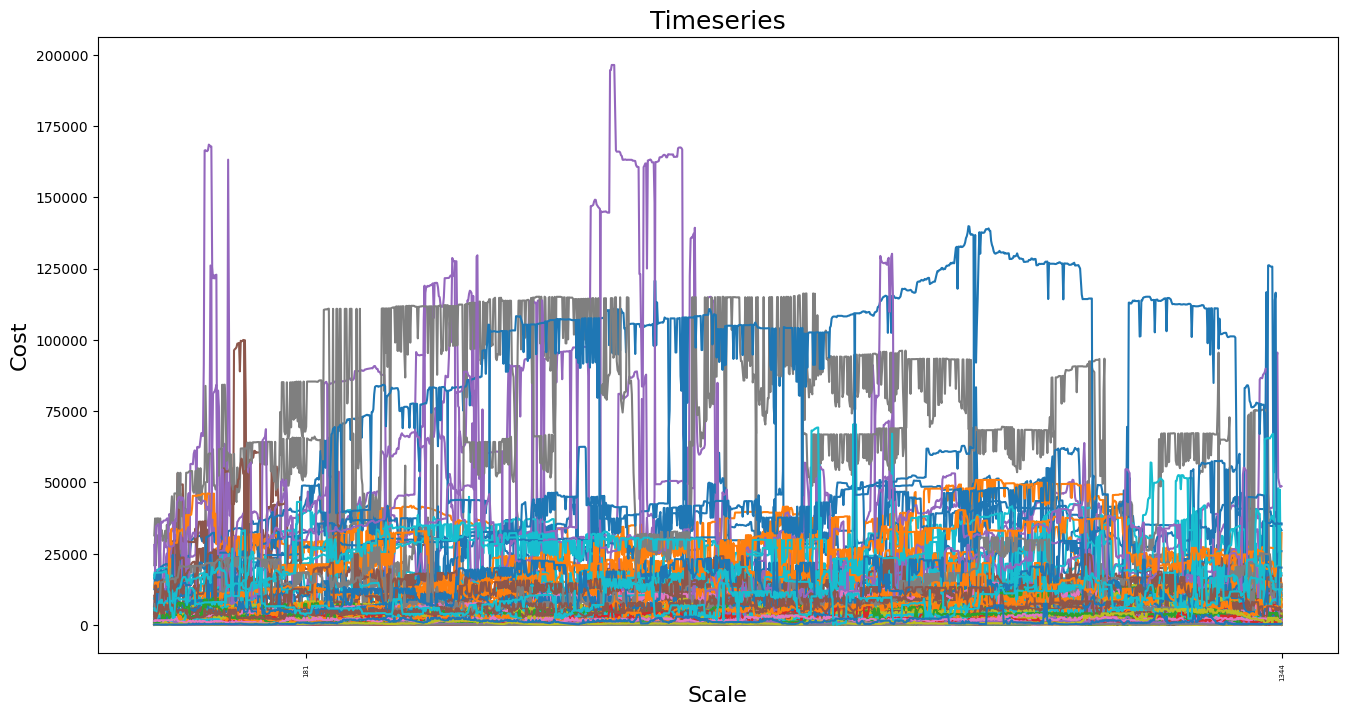

In [12]:
dims = list(new_list[0].columns)
# Vẽ biểu đồ bboxplot
plt.figure(figsize=(16, 8))
for col in dims:
    plt.plot([x for x in range(0, new_list[0].shape[0])], new_list[0][col])
plt.xlabel('Scale', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.xticks(new_list[0].shape, rotation=90, fontsize=5)
plt.title("Timeseries", fontsize=18)

## Ý tưởng lập mô hình:
* Dùng phương pháp PCA để giảm chiều dữ liệu: mỗi công ty (ứng với một mã cổ phiếu) có 6 features bao gồm "mua_gia_1", "ban_gia_1", "mua_kl_1", "ban_kl_1", "mua_kl_2", "ban_kl_2" được giảm chiều dữ liệu thành một feature duy nhất, sau đó tính hai thống kê bao gồm mean và variance đại diện cho mỗi công ty.
* Phân các công ty thành 4 cụm để đánh giá về sự biến động trong đó trục x là mean, trục y là variance
* Chú thích: bài làm bên dưới là PCA và Cluster trên một ngày và trên toàn bộ dữ liệu (23D)

## PCA df[0]

### Chuẩn hóa dữ liệu trước khi lập mô hình

In [13]:
df_standard_scaler = []
for df_unit in new_list:
    df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df_unit.loc[:, feature_remove_target].values),\
        columns = feature_remove_target)
    df_standard_scaler.append(df_tranform)

In [14]:
temp_df_standard_scaler = df_standard_scaler[0]
pca_dataframe_company = pd.DataFrame()
pca = PCA(n_components = 1)
for company in company_list:
    dataframe_company = pd.DataFrame()
    for feature in action_features_list:
        dataframe_company= pd.concat([dataframe_company, temp_df_standard_scaler.loc[:, ''.join([feature, company])]], axis = 1)
    component = pd.DataFrame(pca.fit_transform(dataframe_company.values), columns = [company])
    pca_dataframe_company = pd.concat([pca_dataframe_company, component], axis = 1)
print(pca_dataframe_company)

           ACB       BCM       BID       BVH       CTG       FPT       GAS  \
0     3.674689 -1.421069 -3.558526 -2.043473 -2.472939 -3.671157 -1.925112   
1     3.740848 -1.421069 -3.419468 -2.040640 -2.338615 -3.339909 -2.017512   
2     3.705669 -1.421069 -3.558526 -2.043473 -2.321395 -3.488272 -1.973730   
3     3.628643 -1.421069 -3.422931 -2.047986 -2.414979 -3.320877 -1.939839   
4     3.671680 -1.142451 -3.558526 -2.051642 -2.430692 -3.531899 -1.951702   
...        ...       ...       ...       ...       ...       ...       ...   
1339 -2.230791  3.043996  1.047709  2.621337  2.714329  4.201748  2.094059   
1340 -1.773187  3.043996  0.370587  2.696283  2.970372  4.166484  1.893035   
1341 -2.193104  4.271619  0.669452  2.598216  2.987136  3.320545  1.835740   
1342 -2.076753  3.043996  0.669452  2.595722  2.980777  3.324940  1.696927   
1343 -2.103054  3.043996  0.357051  2.832825  2.974398  3.309457  1.704707   

           GVR       HDB       HPG  ...       TCB       TPB    

In [15]:
dataframe_cluster = pd.DataFrame()
for company in company_list:
    temp = pd.DataFrame(data = [[ np.mean(pca_dataframe_company.loc[:,company].values)], \
                            [np.var(pca_dataframe_company.loc[:,company].values)]], \
                            columns = [company], index = ["mean", "variance"])
    dataframe_cluster= pd.concat([dataframe_cluster, temp], axis =1)
print(dataframe_cluster)

                   ACB           BCM           BID           BVH  \
mean      1.691768e-16  8.458842e-17  8.458842e-17 -8.458842e-17   
variance  2.142765e+00  2.183653e+00  2.712754e+00  2.250643e+00   

                   CTG           FPT           GAS       GVR           HDB  \
mean      1.691768e-16 -8.458842e-17 -8.458842e-17  0.000000 -8.458842e-17   
variance  3.018098e+00  2.459209e+00  2.214248e+00  2.639015  3.361215e+00   

                   HPG  ...       TCB           TPB           VCB  \
mean      4.229421e-17  ...  0.000000 -1.691768e-16  1.691768e-16   
variance  3.336763e+00  ...  2.391063  2.817535e+00  2.588665e+00   

                   VHM       VIB       VIC       VJC      VNM       VPB  \
mean      8.458842e-17  0.000000  0.000000  0.000000  0.00000  0.000000   
variance  2.460362e+00  3.282189  2.550123  2.520436  3.46201  2.257468   

                   VRE  
mean     -1.691768e-16  
variance  2.979350e+00  

[2 rows x 30 columns]


## Cluster df[0]

In [16]:
def findColumnName(index1, index2, dataframe_in_use, list_data):
    for item in list_data:
        if (dataframe_in_use.at["mean", item] == index1) and (dataframe_in_use.at["variance", item] == index2):
            return item
    return "none"

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\84947\AppData\Local\Packages\PythonSoftw

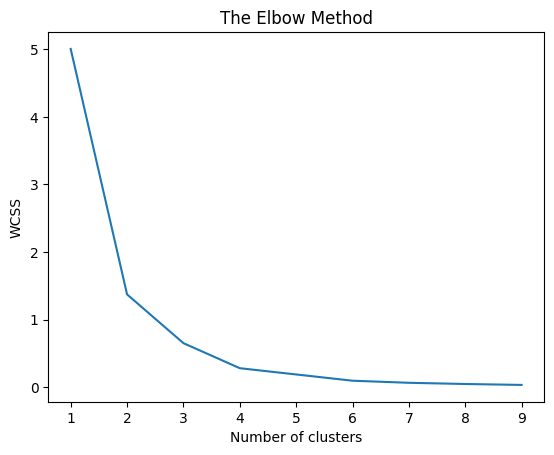

In [17]:
df_cluster = dataframe_cluster.transpose()
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(df_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Dựa vào Elbow Method, ta chọn số cụm cho dữ liệu là 3

In [18]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_cluster)

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



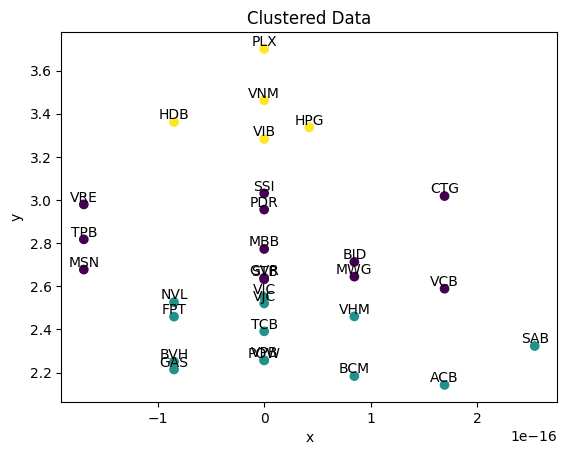

In [19]:
plt.scatter(df_cluster.loc[:, "mean"], df_cluster.loc[:, "variance"], c=clusters)
for (xi, yi) in zip(df_cluster.loc[:, "mean"].values, df_cluster.loc[:, "variance"].values):
    text_temp = findColumnName(xi, yi, dataframe_cluster, company_list)
    plt.text(xi, yi, text_temp, va='bottom', ha='center')
plt.title('Clustered Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Phân tích khi phân cụm trên mẫu 1 df ta có thể thấy một số đặc điểm của các nhóm:
* Về qui mô: các công ty có trung bình cao, chẳng hạn như ACB, SAB, VCB, CTG được đánh giá là có quy mô thị trường lớn, khả năng đem lại lợi nhuận cao, có thể thu hút các nhà đầu tư với người tham gia thị trường; các công ty có trung bình thấp, chẳng hạn như MSN, TPB, VRE được đánh giá là có qui mô thị trường nhỏ, khả năng đem lại lợi nhuận thấp.
* Về sự biến động: các công ty có phương sai lớn, chẳng hạn như HDB, PLX, VNM, VIB, HPG, được đánh giá là có độ biến động lớn, tiềm năng sinh lời cũng như rủi ro cao, khó đoán được xu hướng của thị trường; các công ty có phương sai nhỏ, chẳng hạn như GAS, BVH, FPT, NVL, POW, VPB, TCB, VJC, VIC, BCM, VHM, ACB, SAB, được đánh giá là có độ biến động nhỏ, tiềm năng sinh lời cũng như rủi ro thấp, thuộc nhóm cổ phiếu an toàn.
* Về công ty tiềm năng: ACB, SAB được đánh giá là một trong những công ty tiềm năng nhất do có qui mô giao dịch lớn và thị trường ổn định, ít biến động. 
Các nhận định trên chỉ đánh giá được một phần, không đủ đưa ra những phán đoán chính xác về tiềm năng và xu hướng của một mã cổ phiếu. Cần có những yếu tố khác như phân tích kĩ thuật thông tin doanh nghiệp và thị trường cũng như các yếu tố ảnh hưởng đến nền kinh tế thị trường.

## PCA 23Day

In [78]:
df = pd.read_pickle(new_pkl_path)
df_standard_scaler = []
for df_unit in df:
    df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df_unit.loc[:, feature_remove_target].values),\
        columns = feature_remove_target)
    df_standard_scaler.append(df_tranform)

In [79]:
scale_data_23d = pd.DataFrame()
for item in df_standard_scaler:
    scale_data_23d= pd.concat([scale_data_23d, item], ignore_index = True)

pca_dataframe_company_23d = pd.DataFrame()
pca_23d = PCA(n_components = 1)
for company in company_list:
    dataframe_company_23d = pd.DataFrame()
    for feature in action_features_list:
        dataframe_company_23d= pd.concat([dataframe_company_23d, scale_data_23d.loc[:, ''.join([feature, company])]], axis = 1)
    component_23d = pd.DataFrame(pca_23d.fit_transform(dataframe_company_23d.values), columns = [company])
    pca_dataframe_company_23d = pd.concat([pca_dataframe_company_23d, component_23d], axis = 1)
print(pca_dataframe_company_23d)

            ACB       BCM       BID       BVH        CTG       FPT       GAS  \
0     -2.603866 -1.216735 -3.512226 -2.052905  -1.578983 -2.902974 -2.208083   
1     -2.529390 -1.216735 -3.479711 -1.890728  -1.490212 -3.070599 -2.284678   
2     -2.555791 -1.216735 -3.512226 -2.052905  -1.437566 -3.001825 -2.254028   
3     -2.638475 -1.216735 -3.536801 -1.896177  -1.518814 -3.108969 -2.212234   
4     -2.595922 -1.243153 -3.512226 -2.145711  -1.535364 -2.783205 -2.135226   
...         ...       ...       ...       ...        ...       ...       ...   
30533  0.769663  0.605298  0.803574  3.226139   0.732561  3.053018 -0.253352   
30534  2.080222  0.605298  0.915740  3.226139   1.118579  3.841495  0.744390   
30535  1.529559  0.666950  1.049337  3.226139   9.009737  2.510949  0.218042   
30536  1.529559  0.678742  0.915740  3.226139  11.639573  2.510949  0.218042   
30537  0.905315  0.682402  1.346969  3.226139  11.639573  2.986411  0.218042   

             GVR        HDB        HPG 

## Cluster 23Day

In [ ]:
dataframe_cluster_23d = pd.DataFrame()
for company in company_list:
    temp_23d = pd.DataFrame(data = [[ np.mean(pca_dataframe_company_23d.loc[:,company].values)], \
                            [np.var(pca_dataframe_company_23d.loc[:,company].values)]], \
                            columns = [company], index = ["mean", "variance"])
    dataframe_cluster_23d= pd.concat([dataframe_cluster_23d, temp_23d], axis =1)
print(dataframe_cluster_23d)

                   ACB           BCM           BID           BVH  \
mean      2.978239e-17  2.792099e-18  1.861400e-17 -1.302980e-17   
variance  2.073835e+00  1.900071e+00  2.112825e+00  1.862018e+00   

                   CTG           FPT           GAS           GVR  \
mean      4.095079e-17 -9.306998e-18 -5.211919e-17  2.233679e-17   
variance  2.195006e+00  2.170452e+00  2.286930e+00  2.175419e+00   

                   HDB           HPG  ...           TCB           TPB  \
mean     -1.489120e-17  1.582190e-17  ...  5.584199e-17  2.140609e-17   
variance  2.074875e+00  2.317501e+00  ...  1.984960e+00  2.121434e+00   

                   VCB           VHM           VIB           VIC  \
mean     -6.701038e-17  1.116840e-17 -7.445598e-18  7.445598e-18   
variance  2.036255e+00  1.968026e+00  2.074594e+00  2.110829e+00   

                   VJC           VNM           VPB           VRE  
mean     -2.978239e-17  1.768330e-17  2.512889e-17 -2.699029e-17  
variance  1.875689e+00  2.19383

In [ ]:
def findColumnName(index1, index2, dataframe_in_use, list_data):
    for item in list_data:
        if (dataframe_in_use.at["mean", item] == index1) and (dataframe_in_use.at["variance", item] == index2):
            return item
    return "none"

In [ ]:
df_cluster_23d = dataframe_cluster_23d.transpose()

kmeans_23d = KMeans(n_clusters=3)
clusters_23d = kmeans_23d.fit_predict(df_cluster_23d)

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans_23d = KMeans(n_clusters=4)
clusters_23d = kmeans.fit_predict(df_cluster_23d)

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


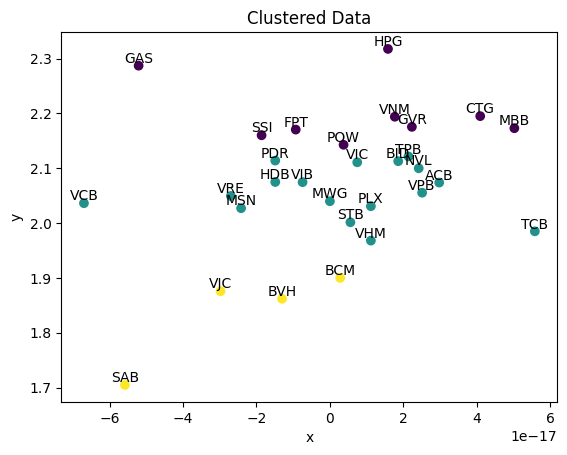

In [ ]:
plt.scatter(df_cluster_23d.loc[:, "mean"], df_cluster_23d.loc[:, "variance"], c=clusters_23d)
for (xi, yi) in zip(df_cluster_23d.loc[:, "mean"].values, df_cluster_23d.loc[:, "variance"].values):
    text_temp = findColumnName(xi, yi, dataframe_cluster_23d, company_list)
    plt.text(xi, yi, text_temp, va='bottom', ha='center')
plt.title('Clustered Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Phân tích khi phân cụm trên toàn bộ dữ liệu ta có thể thấy một số đặc điểm của các nhóm:
* Về qui mô: các công ty có trung bình cao, chẳng hạn như MBB, TCB, CTG được đánh giá là có quy mô thị trường lớn, khả năng đem lại lợi nhuận cao, có thể thu hút các nhà đầu tư với người tham gia thị trường; các công ty có trung bình thấp, chẳng hạn như SAB, VCB, GAS được đánh giá là có qui mô thị trường nhỏ, khả năng đem lại lợi nhuận thấp.
* Về sự biến động: các công ty có phương sai lớn, chẳng hạn như GAS, HPG, SSI, FPT, POW, VNM, GVR, CTG, MBB, được đánh giá là có độ biến động lớn, tiềm năng sinh lời cũng như rủi ro cao, khó đoán được xu hướng của thị trường; các công ty có phương sai nhỏ, chẳng hạn như SAB, VJC, BVH, BCM, được đánh giá là có độ biến động nhỏ, tiềm năng sinh lời cũng như rủi ro thấp, thuộc nhóm cổ phiếu an toàn.
* Về công ty tiềm năng: TCB được đánh giá là một trong những công ty tiềm năng nhất do có qui mô giao dịch lớn và thị trường tương đối ít biến động. 
Các nhận định trên chỉ đánh giá được một phần, không đủ đưa ra những phán đoán chính xác về tiềm năng và xu hướng của một mã cổ phiếu. Cần có những yếu tố khác như phân tích kĩ thuật thông tin doanh nghiệp và thị trường cũng như các yếu tố ảnh hưởng đến nền kinh tế thị trường.

# RNN - Attributes Time Series Forecasting


## `1.`Library

In [10]:
import IPython
import IPython.display
import matplotlib as mpl
import seaborn as sns

from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## `2.` Data prepare & split

In [11]:
df_list = pd.read_pickle(new_pkl_path)
df_unpca = pd.DataFrame()
for df_unit in df_list:
    df_unpca = pd.concat([df_unpca, df_unit], axis = 0)
df_target =df_unpca['Gia KL']
pca_dataframe_company = pd.DataFrame()
pca = PCA(n_components = 1)
for company in company_list:
    dataframe_company = pd.DataFrame()
    for feature in action_features_list:
        dataframe_company= pd.concat([dataframe_company, df_unpca.loc[:, ''.join([feature, company])]], axis = 1)
    component = pd.DataFrame(pca.fit_transform(dataframe_company.values), columns = [company])
    pca_dataframe_company = pd.concat([pca_dataframe_company, component], axis = 1)
df = pca_dataframe_company

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(df_target).reshape(len(df_target), 1))
series = pd.DataFrame(scaled)
series.columns = ['target']
print(series)

         target
0      0.685832
1      0.686972
2      0.686858
3      0.686223
4      0.685832
...         ...
30533  0.129135
30534  0.125029
30535  0.125941
30536  0.125257
30537  0.125029

[30538 rows x 1 columns]


Do đây là bộ dữ liệu khá lớn. Chia dữ liệu với tỉ lệ 7/2/1 (train/dev/test) hoặc có thể chia tỉ lệ 9/1(train/test)

In [14]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

target_train_df = series[0:int(n*0.7)]
target_val_df = series[int(n*0.7):int(n*0.9)]
target_test_df = series[int(n*0.9):]
print(train_df.shape[0], val_df.shape[0], test_df.shape[0] )
print(target_train_df.shape[0], target_val_df.shape[0], target_test_df.shape[0] )


21376 6108 3054
21376 6108 3054


In [15]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

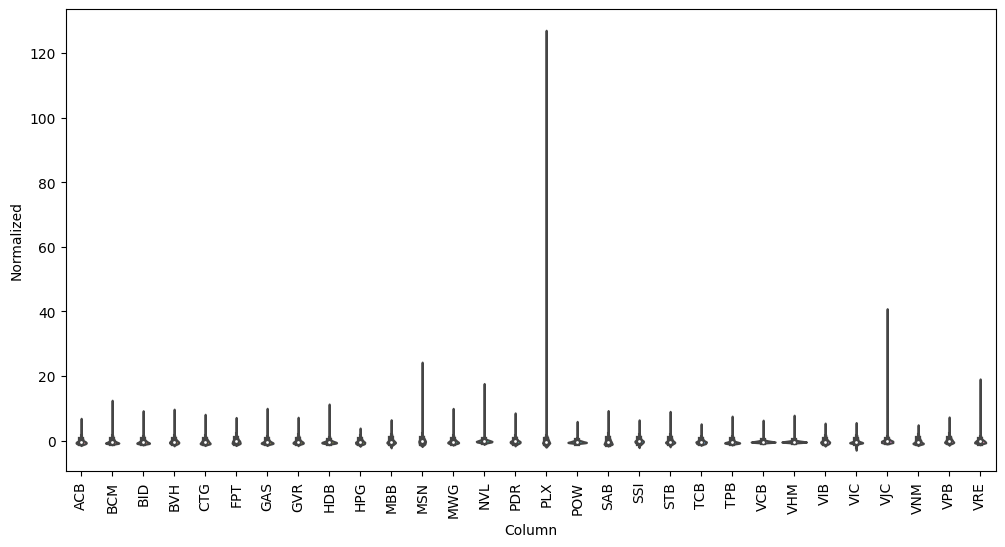

In [16]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [18]:
data_train = []
for item in company_list:
    item = np.array(train_df[item]).reshape((train_df[item].shape[0],1))
    data_train.append(item)
train_target = np.array(target_train_df).reshape((target_train_df.shape[0],1))
data_train.append(np.array(target_train_df).reshape((target_train_df.shape[0],1)))
print(data_train)
datatrain_feed = hstack(data_train)


[array([[-1.14761383],
       [-1.13467583],
       [-1.1323797 ],
       ...,
       [ 0.50030674],
       [ 0.49715114],
       [ 0.81290303]]), array([[-1.00326943],
       [-1.00326943],
       [-1.00326943],
       ...,
       [ 1.98668485],
       [ 1.89852716],
       [ 2.65377631]]), array([[-1.0057171 ],
       [-0.87917726],
       [-1.0057171 ],
       ...,
       [-1.04268419],
       [-1.04210757],
       [-1.03502695]]), array([[-1.16395726],
       [-0.926192  ],
       [-1.16395726],
       ...,
       [-0.10635363],
       [-0.42049572],
       [ 0.24426622]]), array([[-0.47102594],
       [-0.33608435],
       [-0.31962528],
       ...,
       [ 0.40095795],
       [ 0.44367184],
       [ 0.39269574]]), array([[ 0.05748839],
       [ 0.09021164],
       [ 0.07499056],
       ...,
       [-0.54530147],
       [-0.60090249],
       [-0.61261378]]), array([[-0.94165426],
       [-1.0450229 ],
       [-0.98928715],
       ...,
       [-0.78526974],
       [-0.49973511],
 

In [19]:
data_val = []
for item in company_list:
    item = np.array(val_df[item]).reshape((val_df[item].shape[0],1))
    data_val.append(item)
val_target = np.array(target_val_df).reshape((target_val_df.shape[0],1))
data_val.append(np.array(target_val_df).reshape((target_val_df.shape[0],1)))
print(data_val)
dataval_feed = hstack(data_val)


[array([[ 0.78781388],
       [ 0.78187555],
       [ 0.78768866],
       ...,
       [ 0.21432974],
       [-0.29539412],
       [-0.29193902]]), array([[ 2.57048525],
       [ 2.73672758],
       [ 2.05938919],
       ...,
       [-0.53110902],
       [-0.55340798],
       [-0.79998332]]), array([[-0.99816034],
       [-1.03121349],
       [-1.0052113 ],
       ...,
       [-0.9704526 ],
       [-1.05667216],
       [-1.05575103]]), array([[-0.15240051],
       [-0.04580128],
       [ 0.51182764],
       ...,
       [-0.24174775],
       [-0.73791257],
       [-0.71609512]]), array([[ 0.25679701],
       [ 0.41374873],
       [ 0.58488139],
       ...,
       [-0.57147374],
       [-0.42560068],
       [-0.53947472]]), array([[-0.17087422],
       [-0.5564497 ],
       [-0.5586128 ],
       ...,
       [-0.05802401],
       [ 0.50710837],
       [-0.11742955]]), array([[-0.82360155],
       [-0.82614   ],
       [-0.83696014],
       ...,
       [-1.07024464],
       [-1.07290216],
 

In [20]:
data_test = []
for item in company_list:
    item = np.array(test_df[item]).reshape((test_df[item].shape[0],1))
    data_test.append(item)
test_target = np.array(target_test_df).reshape((target_test_df.shape[0],1))
data_test.append(np.array(target_test_df).reshape((target_test_df.shape[0],1)))
print(data_test)
datatest_feed = hstack(data_test)

[array([[-0.29247243],
       [-0.29012289],
       [-0.37439981],
       ...,
       [ 1.72189917],
       [ 1.72189917],
       [ 3.14357846]]), array([[-0.5713379 ],
       [-0.63687531],
       [-0.6536555 ],
       ...,
       [-0.29429468],
       [-0.21774727],
       [-0.19399117]]), array([[-1.02317638],
       [-1.01805416],
       [-1.04503391],
       ...,
       [-1.0053582 ],
       [-0.92102407],
       [-0.83956288]]), array([[-0.69098949],
       [-0.27124651],
       [-0.27759698],
       ...,
       [-0.36116425],
       [-0.36116425],
       [-0.36116425]]), array([[-0.42541863],
       [-0.55882635],
       [-0.45194152],
       ...,
       [-0.22572934],
       [-0.84300825],
       [-0.84300825]]), array([[-0.15439942],
       [-0.18750984],
       [-0.21417094],
       ...,
       [-0.04348283],
       [-0.04348283],
       [ 2.13860814]]), array([[-0.80268743],
       [-1.06738669],
       [-1.0676375 ],
       ...,
       [-0.37241111],
       [-0.37241111],
 

In [21]:
n_features = datatrain_feed.shape[1]
n_input = len(company_list)
generator_train = TimeseriesGenerator(datatrain_feed, train_target, length=n_input, batch_size=len(datatrain_feed))

In [22]:
generator_test = TimeseriesGenerator(datatest_feed, test_target, length=n_input, batch_size=1)


In [23]:
generator_hold = TimeseriesGenerator(dataval_feed, val_target, length=n_input, batch_size=1)

Sử dụng model Simple RNN 

In [24]:
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))
model.add(Dense(1, activation='relu'))

adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 144       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## `3.` Training Model
Các thông số:   
- CPU: M1 Apple Silicion
- 8GB RAM

In [26]:
score = model.fit_generator(generator_train, epochs=1000, verbose=0, validation_data=generator_test)

/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_33624/3835623496.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  score = model.fit_generator(generator_train, epochs=1000, verbose=0, validation_data=generator_test)
2023-05-13 18:14:48.982939: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-13 18:14:49.507672: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [44]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


## `4.` Predict

In [ ]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [28]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
print(df_result)

           Actual   Prediction      Diff
0     1038.650000  1086.755981  4.631587
1     1038.700000  1085.780151  4.532603
2     1038.600000  1082.340698  4.211506
3     1038.500000  1089.809204  4.940703
4     1038.500000  1085.466675  4.522549
...           ...          ...       ...
3019  1022.733333  1055.223999  3.176846
3020  1022.433333  1070.287354  4.680405
3021  1022.500000  1055.817871  3.258472
3022  1022.450000  1060.921265  3.762655
3023  1022.433333  1048.938965  2.592407

[3024 rows x 3 columns]


In [29]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  1027.0927466773746
mae: 30.28292018822141
mae/mean ratio:  2.9484114541930198 %
correctness:  97.05158854580698 %


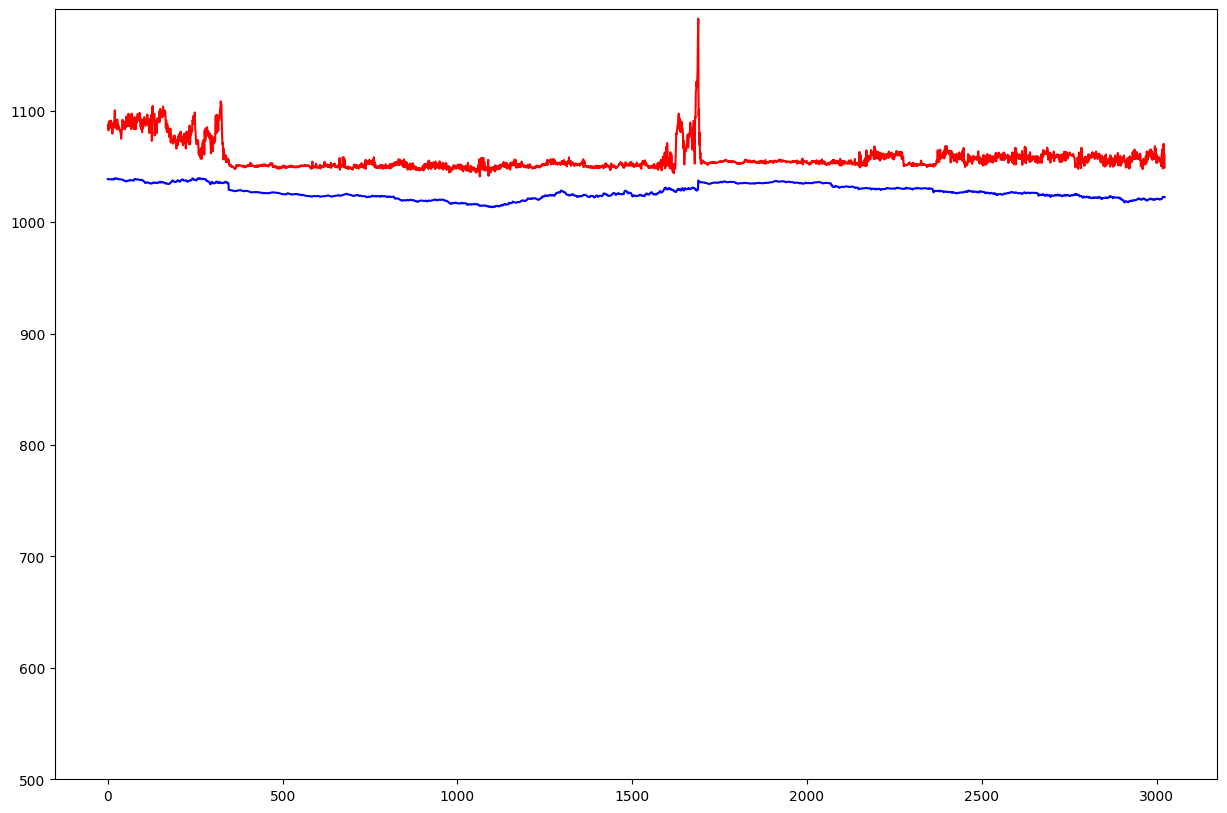

In [43]:
plt.figure(figsize=(15,10))
plt.plot(df_result.loc[:,'Actual'], color='blue', label = "Actual")
plt.plot(df_result.loc[:,'Prediction'], color='red', label = "Predict")
plt.yticks([x for x in range(500, 1200) if x % 100 ==0])
plt.show()

Có thể thấy có khoảng phương sai nhất định giữa dữ liệu dự báo và dữ liệu test, tuy nhiên có thể thấy xu hướng của dữ liệu giống nhau ở một số thời đoạn xảy ra bất thường. Điều này có thể thực hiện một số kiểm định liên quan đến time series như Decomposition để kiểm tra.

# REFERENCE
[1] https://bard.google.com  
[2] Business Forecasting (2009)- John E. Hanke, Dean W. Wichern, Publisher: Pearson/Prentice Hall  
[3] Scitkit-learn Documentation, URL: https://scikit-learn.org/stable/